# Popularity-Based Movie Recommendation System

## Overview
This notebook implements a popularity-based recommendation system that ranks movies based on their overall popularity using weighted rating calculations.

## Methodology
- **Weighted Rating Formula**: Balances movie quality with popularity
- **Statistical Analysis**: Uses quantile-based thresholds
- **Data Visualization**: Comprehensive charts and analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configure plotting
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

print("Libraries loaded successfully")
print(f"Execution time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Libraries loaded successfully
Execution time: 2025-09-28 11:21:19


In [3]:
# Load datasets
movies = pd.read_csv('./data/movies.csv')
credits = pd.read_csv('./data/credits.csv')
ratings = pd.read_csv('./data/ratings.csv')

print(f"Movies dataset: {len(movies):,} records")
print(f"Ratings dataset: {len(ratings):,} records")
print(f"Credits dataset: {len(credits):,} records")

# Basic statistics
print(f"\nBasic movie statistics:")
print(f"Average rating: {movies['vote_average'].mean():.2f}")
print(f"Average vote count: {movies['vote_count'].mean():.0f}")
print(f"Highest rating: {movies['vote_average'].max()}")
print(f"Lowest rating: {movies['vote_average'].min()}")

Movies dataset: 4,803 records
Ratings dataset: 100,004 records
Credits dataset: 4,803 records

Basic movie statistics:
Average rating: 6.09
Average vote count: 690
Highest rating: 10.0
Lowest rating: 0.0


## Calculate a weighted rating


### Weighted_Rating = (v / (v + m)) * R + (m / (v + m)) * C 

* v-number of votes for a movie
* m-min number of votes required
* R-average rating of the movie
* C-average rating across all movies

In [4]:
# Calculate parameters for weighted rating
m = movies['vote_count'].quantile(0.9)
C = movies['vote_average'].mean()

print(f"Minimum votes required (m): {m:.0f}")
print(f"Mean vote across dataset (C): {C:.3f}")

# Additional statistics
print(f"\nAdditional statistics:")
print(f"Qualified movies (>{m:.0f} votes): {len(movies[movies['vote_count'] >= m]):,}")
print(f"Qualification percentage: {len(movies[movies['vote_count'] >= m])/len(movies)*100:.1f}%")
print(f"Average vote count: {movies['vote_count'].mean():.0f}")
print(f"Median vote count: {movies['vote_count'].median():.0f}")

Minimum votes required (m): 1838
Mean vote across dataset (C): 6.092

Additional statistics:
Qualified movies (>1838 votes): 481
Qualification percentage: 10.0%
Average vote count: 690
Median vote count: 235


In [5]:
def weighted_rating(df, m=m, C=C):
    """
    Calculate weighted rating for a movie using the IMDB formula.
    
    Parameters:
    df (pandas.Series): Movie data containing vote_average and vote_count
    m (float): Minimum votes required to be listed
    C (float): Mean vote across the entire dataset
    
    Returns:
    float: Weighted rating score
    """
    R = df['vote_average']  # Average rating of the movie
    v = df['vote_count']    # Number of votes for the movie
    
    # Apply the weighted rating formula
    wr = ((v / (v + m)) * R) + ((m / (v + m)) * C)
    return wr

print("Weighted rating function defined successfully!")

Weighted rating function defined successfully!


In [6]:
movies["weighted_rating"] = movies.apply(weighted_rating, axis=1)

In [7]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,weighted_rating
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,6.239396


Top 10 Movies by Weighted Rating:
 1. The Shawshank Redemption
    Rating: 8.5 | Votes: 8,205 | Weighted: 8.059

 2. Fight Club
    Rating: 8.3 | Votes: 9,413 | Weighted: 7.939

 3. The Dark Knight
    Rating: 8.2 | Votes: 12,002 | Weighted: 7.920

 4. Pulp Fiction
    Rating: 8.3 | Votes: 8,428 | Weighted: 7.905

 5. Inception
    Rating: 8.1 | Votes: 13,752 | Weighted: 7.863

 6. The Godfather
    Rating: 8.4 | Votes: 5,893 | Weighted: 7.851

 7. Interstellar
    Rating: 8.1 | Votes: 10,867 | Weighted: 7.809

 8. Forrest Gump
    Rating: 8.2 | Votes: 7,927 | Weighted: 7.803

 9. The Lord of the Rings: The Return of the King
    Rating: 8.1 | Votes: 8,064 | Weighted: 7.727

10. The Empire Strikes Back
    Rating: 8.2 | Votes: 5,879 | Weighted: 7.698



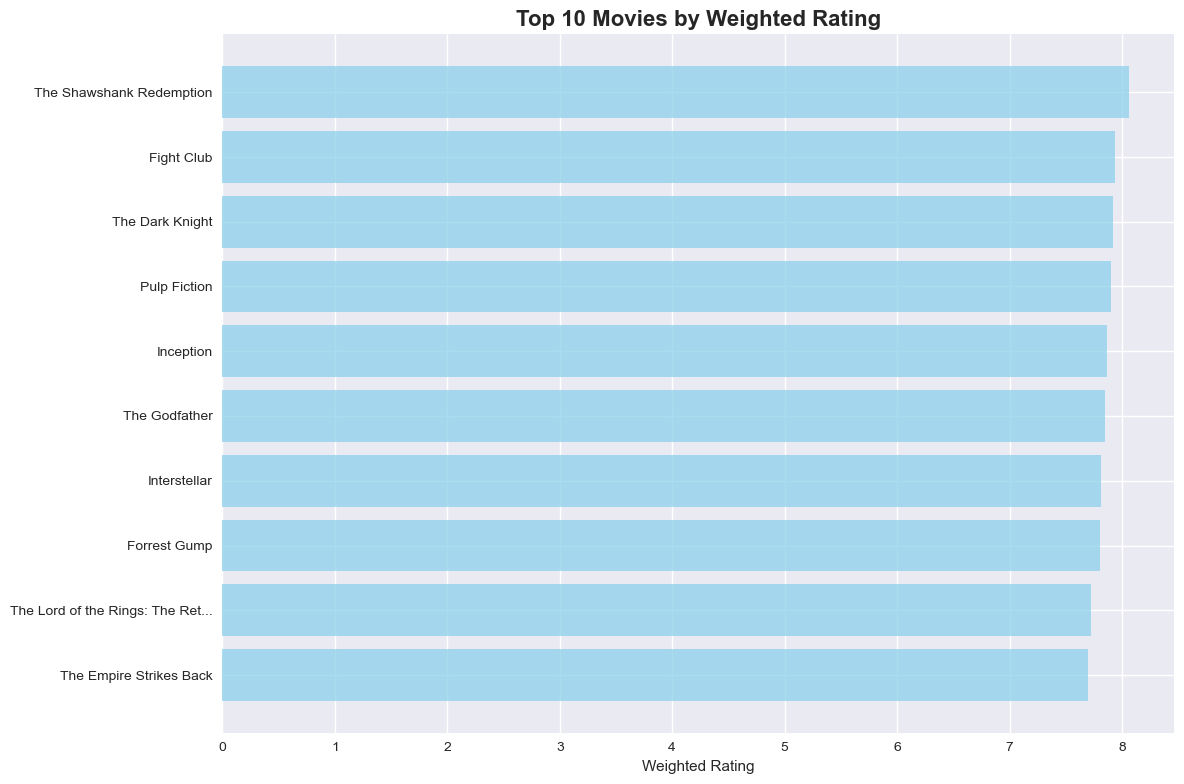

In [8]:
# Get top 10 movies by weighted rating
print("Top 10 Movies by Weighted Rating:")
top_movies = movies.sort_values('weighted_rating', ascending=False)[['title', 'vote_count', 'vote_average', 'weighted_rating']].head(10)

# Display with better formatting
for i, (idx, row) in enumerate(top_movies.iterrows(), 1):
    print(f"{i:2d}. {row['title']}")
    print(f"    Rating: {row['vote_average']:.1f} | Votes: {row['vote_count']:,} | Weighted: {row['weighted_rating']:.3f}")
    print()

# Create visualization
plt.figure(figsize=(12, 8))
top_10 = movies.sort_values('weighted_rating', ascending=False).head(10)
plt.barh(range(len(top_10)), top_10['weighted_rating'], color='skyblue', alpha=0.7)
plt.yticks(range(len(top_10)), [title[:30] + '...' if len(title) > 30 else title for title in top_10['title']])
plt.xlabel('Weighted Rating')
plt.title('Top 10 Movies by Weighted Rating', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [9]:
movies.sort_values('weighted_rating', ascending=False)[['title']].head(10).to_dict()

{'title': {1881: 'The Shawshank Redemption',
  662: 'Fight Club',
  65: 'The Dark Knight',
  3232: 'Pulp Fiction',
  96: 'Inception',
  3337: 'The Godfather',
  95: 'Interstellar',
  809: 'Forrest Gump',
  329: 'The Lord of the Rings: The Return of the King',
  1990: 'The Empire Strikes Back'}}